In [ ]:
#installing kaggle 
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#making a directory
!mkdir ~/.kaggle

In [ ]:
# COPY CONTENT BELOW IN A JSON AND NAME IT kaggle.json
# {"username":"varshapwalia","key":"f740f4ae05dd367aa8698235a1e924da"}

In [ ]:
# UPLOAD THE kaggle.json in files and run the below cmds

In [ ]:
! cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
 #downloading Dataset1
# ! kaggle datasets download grassknoted/asl-alphabet

In [ ]:
#Unzipping the dataset 1
# ! unzip asl-alphabet.zip

In [ ]:
#Downloading Dataset 2
# ! kaggle datasets download ayuraj/american-sign-language-dataset

In [ ]:
#uniziping Dataset 2
# ! unzip american-sign-language-dataset.zip

In [ ]:
#Downloading Dataset 3
! kaggle datasets download ayuraj/asl-dataset

 58% 33.0M/56.9M [00:00<00:00, 128MB/s] 
100% 56.9M/56.9M [00:00<00:00, 148MB/s]


In [ ]:
# Unziping dataset 3
! unzip asl-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_dataset/0/hand2_0_dif_seg_1_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_dif_seg_2_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_dif_seg_3_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_dif_seg_4_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_dif_seg_5_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_1_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_2_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_3_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_4_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_5_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_1_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_2_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_3_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_4_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_5_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0

In [ ]:
import os

In [ ]:
# os.listdir('/content/asl_alphabet_train/asl_alphabet_train')

In [ ]:
os.listdir('/content/asl_dataset/asl_dataset')

['p',
 't',
 '6',
 '8',
 'w',
 'f',
 '2',
 'i',
 '4',
 'j',
 'x',
 '0',
 'h',
 '5',
 'z',
 '9',
 'o',
 'm',
 's',
 'b',
 'c',
 '7',
 'a',
 '1',
 'g',
 'n',
 'v',
 'k',
 'e',
 'l',
 'q',
 'u',
 'r',
 '3',
 'y',
 'd']

In [ ]:
# os.listdir('/content/asl/asl')

In [ ]:
from torch.utils.data import dataloader
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets

# dataset_1_path = '/content/asl_alphabet_train/asl_alphabet_train'
dataset_2_path = '/content/asl_dataset/asl_dataset'
# dataset_3_path = '/content/asl/asl'

def get_dataset_for_normalization_values(data_path):
  dataset_training_transforms = transforms.Compose([
      transforms.Resize((224,224)),
      transforms.ToTensor()
  ])
  train_dataset = torchvision.datasets.ImageFolder(root=data_path, transform= dataset_training_transforms)
  dataset = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle = False)
  return dataset

# dataset_1 = get_dataset_for_normalization_values(dataset_1_path)
dataset_2 = get_dataset_for_normalization_values(dataset_2_path)
# dataset_3 = get_dataset_for_normalization_values(dataset_3_path)


In [ ]:
def get_mean_and_std(loader):
  mean = 0
  std = 0
  total_image_count = 0
  for images, _ in loader:
    image_count_in_a_batch = images.size(0)
    images = images.view(image_count_in_a_batch,images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_image_count += image_count_in_a_batch
    
  mean /= total_image_count
  std /= total_image_count

  return mean,std

In [ ]:
# mean_1, std_1 = get_mean_and_std(dataset_1)

In [ ]:
mean_2, std_2 = get_mean_and_std(dataset_2)

In [ ]:
# mean_3, std_3 = get_mean_and_std(dataset_3)

In [ ]:

def load_dataset(path, test_split, val_split, batch_size, input_size, mean_val, std_dev, len_size_flag):

    transform_dict = {'src' : transforms.Compose(
        [transforms.Resize(input_size),
         transforms.RandomHorizontalFlip(p=.25),
         transforms.RandomRotation(degrees=15),
        #  transforms.RandomVerticalFlip(p=.25),
         transforms.ToTensor(),
         transforms.Normalize(mean = mean_val, std = std_dev)])}
    
    data = datasets.ImageFolder(root = path, transform= transform_dict['src'])
    train_size = int(len(data)*(1-(test_split + val_split)))
    test_size = int(len(data)*test_split) 
    val_size = int(len(data)*val_split)

    print(data)
    print("SPLIT COUNTS", train_size,test_size,val_size)
    # logically the data was not fitting into the total logic of split so had to make the change, becuase of even and odd number of files.
    if len_size_flag:
      val_size=val_size+1
  
    
    train, test, val = torch.utils.data.random_split(data,[train_size, test_size, val_size])
    data_loader_train = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=False, num_workers = 0)
    data_loader_test = torch.utils.data.DataLoader(test, batch_size= batch_size, shuffle=True, drop_last=False, num_workers = 0)
    data_loader_val = torch.utils.data.DataLoader(val, batch_size= batch_size, shuffle=True, drop_last=False, num_workers = 0)
  
    return data_loader_train, data_loader_test, data_loader_val

In [ ]:
# training_1, testing_1, validation_1 = load_dataset(path=dataset_1_path, test_split=0.3, val_split=0.1, batch_size=32, input_size=(224,224), mean_val=mean_1, std_dev=std_1, len_size_flag=False)

In [ ]:
training_2, testing_2, validation_2 = load_dataset(path=dataset_2_path, test_split=0.3, val_split=0.1, batch_size=32, input_size=(224,224), mean_val=mean_2, std_dev=std_2, len_size_flag=True)

Dataset ImageFolder
    Number of datapoints: 2515
    Root location: /content/asl_dataset/asl_dataset
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.25)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=tensor([0.2228, 0.1538, 0.1384]), std=tensor([0.2960, 0.2161, 0.2039]))
           )
SPLIT COUNTS 1509 754 251


In [ ]:
# training_3, testing_3, validation_3 = load_dataset(path=dataset_3_path, test_split=0.3, val_split=0.1, batch_size=32, input_size=(224,224), mean_val=mean_3, std_dev=std_3, len_size_flag=True)

In [ ]:
def plot_data_loader(data_loader, gridDims):
    
    fig, axes = plt.subplots(nrows=gridDims[0], ncols=gridDims[1], figsize=(5,5))
    dataiter = iter(data_loader)
    for i in range(gridDims[0]):
        for j in range(gridDims[1]):
            images, _ = dataiter.next()
            axes[i, j].imshow(np.transpose(images[0].numpy(), (1, 2, 0)))

In [ ]:
# plot_data_loader(training_1, (2,2))

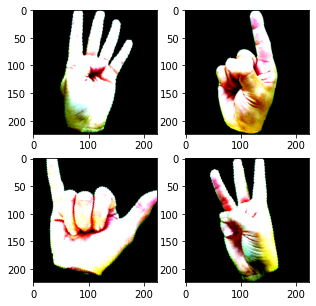

In [ ]:
plot_data_loader(training_2, (2,2))

In [ ]:
# plot_data_loader(training_3, (2,2))

In [ ]:
import torchvision.models as models
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.models as models 
import statistics
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# **RESNET18**

In [ ]:
resnet_model = models.resnet18(pretrained=False)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
lr = 0.001
optimizer = torch.optim.Adam(resnet_model.parameters(), lr = lr)
# scheduler = 
criterion = torch.nn.CrossEntropyLoss()
num_epochs = 50

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
resnet_model.to(device) 

Device: cuda:0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
resnet_training_loss = []
resnet_training_accuracies = []
resnet_val_loss = []
resnet_val_accuracies = []

In [ ]:
def train(num_epochs, model, device, train_loader, val_loader, criterion, optimizer, t_loss, t_acc, v_loss, v_acc):

    total_steps = len(train_loader)
    t1 = time.time()
    print('Training starts...........')
    for epoch in range(num_epochs):
        epo_loss = []
        epo_acc = []
        epo_val_loss = []
        epo_val_acc = []

        for i, data in enumerate(train_loader):
            model.train()
            images, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output,labels)
            loss.backward()
            optimizer.step()
            total = labels.size(0)
            _,predicted = torch.max(output.data, 1)
            correct = (predicted == labels).sum().item()
            accuracy = (correct/total)*100


            correct_val = 0
            total_val = 0
            for data in val_loader:
                model.eval()
                with torch.no_grad():
                  images_val, labels_val = data[0].to(device), data[1].to(device)
                  outputs_val = model(images_val)
                  val_loss = criterion(outputs_val, labels_val)
                  _,predicted_val = torch.max(outputs_val.data, 1)
                  total_val += labels_val.size(0)
                  correct_val += (predicted_val == labels_val).sum().item()
                  val_accuracy = (correct_val/total_val)*100

            if (i % total_steps) == total_steps - 1:
                print('Train Epoch: {}, Train Loss: {:.4f}, Accuracy: {:.2f}%, Validation_loss: {:.4f}, Validation Accuracy: {:.2f}%'
                .format(epoch+1, loss.item(), accuracy, val_loss.item(), val_accuracy))
                epo_loss.append(loss.item())
                epo_acc.append(accuracy)
                epo_val_loss.append(val_loss.item())
                epo_val_acc.append(val_accuracy)

        t_loss.append(statistics.mean(epo_loss))
        t_acc.append(statistics.mean(epo_acc))
        v_loss.append(statistics.mean(epo_val_loss))
        v_acc.append(statistics.mean(epo_val_acc))

    return model

In [ ]:
resnet = train(num_epochs, resnet_model, device, training_2, validation_2, criterion, optimizer, resnet_training_loss,
               resnet_training_accuracies, resnet_val_loss, resnet_val_accuracies)

Training starts...........
Train Epoch: 1, Train Loss: 1.7577, Accuracy: 20.00%, Validation_loss: 3.2795, Validation Accuracy: 16.27%
Train Epoch: 2, Train Loss: 0.6597, Accuracy: 80.00%, Validation_loss: 2.8410, Validation Accuracy: 20.63%
Train Epoch: 3, Train Loss: 1.2676, Accuracy: 60.00%, Validation_loss: 2.8053, Validation Accuracy: 24.21%
Train Epoch: 4, Train Loss: 1.0520, Accuracy: 60.00%, Validation_loss: 1.1379, Validation Accuracy: 67.86%
Train Epoch: 5, Train Loss: 1.2897, Accuracy: 40.00%, Validation_loss: 2.7257, Validation Accuracy: 36.51%
Train Epoch: 6, Train Loss: 0.3982, Accuracy: 80.00%, Validation_loss: 0.4109, Validation Accuracy: 84.92%
Train Epoch: 7, Train Loss: 0.3826, Accuracy: 80.00%, Validation_loss: 1.3380, Validation Accuracy: 59.92%
Train Epoch: 8, Train Loss: 0.1307, Accuracy: 100.00%, Validation_loss: 0.7307, Validation Accuracy: 75.40%
Train Epoch: 9, Train Loss: 0.3519, Accuracy: 80.00%, Validation_loss: 0.5119, Validation Accuracy: 83.73%
Train Epo

In [ ]:
def test(model, device, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0 
        test_loss = 0
        resnet_y_pred = []
        resnet_y_true = [] 
        for data in testing_2:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            test_loss += criterion(outputs, labels).item() 
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            test_loss /= len(test_loader)
            resnet_y_pred.extend(predicted.data.cpu().numpy()) #Save Predictions
            resnet_y_true.extend(labels.data.cpu().numpy()) # Save Truth

        print('Test Accuracy of the model on the {} test images: {} having an average test loss: {:.4f}'
            .format(total, (correct / total) * 100, test_loss))
    
    return resnet_y_pred, resnet_y_true

In [ ]:
resnet_y_pred , resnet_y_true = test(resnet, device, testing_2)

Test Accuracy of the model on the 754 test images: 89.52254641909815 having an average test loss: 0.0066


In [ ]:
def make_confusion_matrix(y_pred,y_true):
    classes = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u',
           'v','w','x','y','z']
    n_classes = len(classes)
    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) * n_classes, index = [i for i in classes],
                     columns = [i for i in classes])
    plt.figure(figsize = (30,15))
    sns.heatmap(df_cm, annot=True)

In [ ]:
torch.save(resnet, f'resnet_{lr}.pt')

In [ ]:
np.savez('resnet_training_loss.npz', resnet_training_loss)
np.savez('resnet_training_accuracies.npz', resnet_training_accuracies)
np.savez('resnet_val_loss.npz', resnet_val_loss)
np.savez('resnet_val_accuracies.npz', resnet_val_accuracies)

# **VGG**

In [ ]:
vgg_model = models.vgg19(pretrained=False)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
optimizer = torch.optim.SGD(vgg_model.parameters(), lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()
num_epochs = 50

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
vgg_model.to(device) 

Device: cuda:0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
vgg_training_loss = []
vgg_training_accuracies = []
vgg_val_loss = []
vgg_val_accuracies = []

In [ ]:
vggnet = train(num_epochs, vgg_model, device, training_2, validation_2, criterion, optimizer, vgg_training_loss, vgg_training_accuracies,
               vgg_val_loss, vgg_val_accuracies)

Training starts...........
Train Epoch: 1, Train Loss: 6.8928, Accuracy: 0.00%, Validation_loss: 6.8814, Validation Accuracy: 0.00%
Train Epoch: 2, Train Loss: 6.7568, Accuracy: 0.00%, Validation_loss: 6.7980, Validation Accuracy: 4.76%
Train Epoch: 3, Train Loss: 5.2393, Accuracy: 0.00%, Validation_loss: 4.3201, Validation Accuracy: 1.59%
Train Epoch: 4, Train Loss: 4.7097, Accuracy: 0.00%, Validation_loss: 4.0278, Validation Accuracy: 2.38%
Train Epoch: 5, Train Loss: 3.5110, Accuracy: 0.00%, Validation_loss: 3.6041, Validation Accuracy: 7.94%
Train Epoch: 6, Train Loss: 3.3305, Accuracy: 20.00%, Validation_loss: 3.3935, Validation Accuracy: 5.95%
Train Epoch: 7, Train Loss: 2.8356, Accuracy: 40.00%, Validation_loss: 3.2459, Validation Accuracy: 9.13%
Train Epoch: 8, Train Loss: 2.0661, Accuracy: 20.00%, Validation_loss: 2.9766, Validation Accuracy: 7.94%
Train Epoch: 9, Train Loss: 3.0682, Accuracy: 0.00%, Validation_loss: 2.9508, Validation Accuracy: 9.92%
Train Epoch: 10, Train Lo

In [ ]:
vggnet_y_pred , vggnet_y_true = test(vggnet, device, testing_2)

Test Accuracy of the model on the 754 test images: 89.12466843501326 having an average test loss: 0.0218


In [ ]:
torch.save(vggnet, 'vggnet.pt')

np.savez('vggnet_training_loss.npz', vgg_training_loss)
np.savez('vggnet_training_accuracies.npz', vgg_training_accuracies)
np.savez('vggnet_val_loss.npz', vgg_val_loss)
np.savez('vggnet_val_accuracies.npz', vgg_val_accuracies)

# **Mobile Net**

In [ ]:
mobilenet_model = models.mobilenet_v2(pretrained=False)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
optimizer = torch.optim.Adam(mobilenet_model.parameters(), lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()
num_epochs = 50

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
mobilenet_model.to(device) 

Device: cuda:0


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
mnet_training_loss = []
mnet_training_accuracies = []
mnet_val_loss = []
mnet_val_accuracies = []

In [ ]:
mobilenet = train(num_epochs, mobilenet_model, device, training_2, validation_2, criterion, optimizer, mnet_training_loss,
                  mnet_training_accuracies,mnet_val_loss, mnet_val_accuracies)

Training starts...........
Train Epoch: 1, Train Loss: 2.6731, Accuracy: 0.00%, Validation_loss: 4.7169, Validation Accuracy: 3.57%
Train Epoch: 2, Train Loss: 1.6730, Accuracy: 40.00%, Validation_loss: 2.7881, Validation Accuracy: 19.84%
Train Epoch: 3, Train Loss: 2.2915, Accuracy: 20.00%, Validation_loss: 1.7459, Validation Accuracy: 34.13%
Train Epoch: 4, Train Loss: 2.3450, Accuracy: 40.00%, Validation_loss: 2.3497, Validation Accuracy: 35.32%
Train Epoch: 5, Train Loss: 0.9681, Accuracy: 40.00%, Validation_loss: 0.7522, Validation Accuracy: 67.46%
Train Epoch: 6, Train Loss: 1.3559, Accuracy: 60.00%, Validation_loss: 0.9936, Validation Accuracy: 57.54%
Train Epoch: 7, Train Loss: 1.3302, Accuracy: 60.00%, Validation_loss: 0.8388, Validation Accuracy: 71.43%
Train Epoch: 8, Train Loss: 1.4165, Accuracy: 40.00%, Validation_loss: 1.3228, Validation Accuracy: 71.83%
Train Epoch: 9, Train Loss: 0.9980, Accuracy: 80.00%, Validation_loss: 0.7789, Validation Accuracy: 68.25%
Train Epoch:

In [ ]:
mnet_y_pred, mnet_y_true = test(mobilenet, device, testing_2)

Test Accuracy of the model on the 754 test images: 93.23607427055704 having an average test loss: 0.0101


In [ ]:
torch.save(mobilenet, 'mobilenet.pt')

np.savez('mnet_training_loss.npz', mnet_training_loss)
np.savez('mnet_training_accuracies.npz', mnet_training_accuracies)
np.savez('mnet_val_loss.npz', mnet_val_loss)
np.savez('mnet_val_accuracies.npz', mnet_val_accuracies)

In [ ]:
mnet_training_accuracies = np.load('mnet_training_accuracies.npz')['arr_0']
vggnet_training_accuracies = np.load('vggnet_training_accuracies.npz')['arr_0']
resnet_training_accuracies = np.load('resnet_training_accuracies .npz')['arr_0']

resnet_training_loss = np.load('resnet_training_loss.npz')['arr_0']
vggnet_training_loss = np.load('vggnet_training_loss.npz')['arr_0']
mnet_training_loss = np.load('mnet_training_loss.npz')['arr_0']